Corona simulator
===============

*Very simple* model for the spread of an epidemic. Inspired by the neat models presented in [this Washington Post article](https://www.washingtonpost.com/graphics/2020/world/corona-simulator/) and the COVID-19 epidemic. 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


todo: 

- [x] randomize velocity directions
- [x] step position based on velocity
- [x] check collision
- [x] time series of infections
- [x] on/off sickness
- [ ] deaths
- [ ] recoveries
- [ ] impact of quarantine
- [ ] random walks 

In [2]:
import numpy as np
import celluloid
from IPython.display import HTML
import random
import tqdm

# initialization

Initial parameters for simulation.

box size in "meters" 

In [3]:
xbox0,xbox1=0,100
ybox0,ybox1=0,100

how many agents?

In [4]:
nagents=40

duration of simulation

In [5]:
tf=200
nsteps=100

distance for an agent to get infected

In [6]:
dinfect=5

what fraction of agents are initially infected?

In [7]:
sick=0.03

time to recover **(TBD)**

In [8]:
trec=7

- fraction of people that will die
- time to die **(TBD)**

In [9]:
deaths=0.01
tdie=trec

## initialize state variables

In [10]:
# positions
x=np.random.uniform(xbox0,xbox1,nagents)
y=np.random.uniform(ybox0,ybox1,nagents)

velocities initialized all the same, with random directions

In [11]:
theta=np.random.uniform(0,2*pi,nagents)

In [12]:
vx=ones_like(x)*cos(theta)
vy=ones_like(x)*sin(theta)

health:

- 0: healthy
- 1: infected
- 2: recovering

In [13]:
health=zeros(nagents,dtype=int)

randomly initialize a fraction of the agents as infected

In [14]:
# list of random elements, non-repeating
i=random.sample(range(nagents),int(sick*nagents))

# 
health[i]=1

# simulation

In [15]:
# time array
tarr=linspace(0,tf,nsteps)

# dt array
dtarr=[t - s for s, t in zip(tarr, tarr[1:])]

# sick array
sick=zeros_like(tarr)

time stepping

100%|██████████| 99/99 [00:00<00:00, 133.41it/s]
/Users/nemmen/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


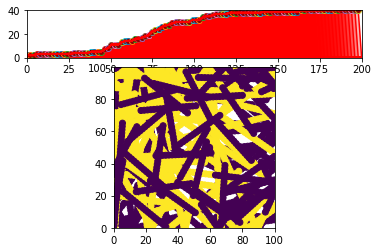

In [16]:
fig = figure(constrained_layout=True)
camera = celluloid.Camera(fig)

# setup subpanels
gs = fig.add_gridspec(4, 1)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1:, 0])

k=0

for dt in tqdm.tqdm(dtarr):
    # update state variables
    # =======================
    
    # reflections
    ## on x
    i=where((x<xbox0) | (x>xbox1))
    if size(i)>0: vx[i]=-vx[i]
    ## on y
    j=where((y<ybox0) | (y>ybox1))
    if size(j)>0: vy[j]=-vy[j]
        
    # steps position
    x=x+vx*dt
    y=y+vy*dt
    
    # health
    ## goes through each particle
    for p in range(nagents):
        # position of current particle
        xp,yp=x[p],y[p]
        # distances to current particle
        distance=sqrt((xp-x)**2+(yp-y)**2)
        # mark current particle to avoid issues
        distance[p]=xbox1**2
        
        # find those agents that are sick and close to the current one
        if any((distance<=dinfect) & (health==1)): 
            health[p]=1
    
    # stats
    sick[k]=size(where(health==1))
            
    # plotting
    # ==========
    #subplot(2,1,1)
    ax1.plot(tarr,sick,'red')
    ax1.fill_between(tarr, zeros_like(sick), sick, alpha=0.3, facecolor='red')
    ax1.plot(tarr[k],sick[k],'o', markerfacecolor='DarkRed')  
    ax1.set_xlim(0,tarr[-1])
    ax1.set_ylim(0,nagents)
    ax1.set_xlabel('Time')

    #subplot(2,1,2)    
    ax2.scatter(x,y,c=health)
    ax2.set_xlim(xbox0,xbox1)
    ax2.set_ylim(ybox0,ybox1)
    #ax2.axes().set_aspect('equal')
    ax2.set_aspect('equal')
    
    camera.snap()
    k=k+1

plays simulation in your browser

In [17]:
%%time
animation = camera.animate()
HTML(animation.to_html5_video())

/Users/nemmen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  


CPU times: user 20.8 s, sys: 280 ms, total: 21.1 s
Wall time: 21.6 s


export movie

In [18]:
animation.save('animation.mp4')

/Users/nemmen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  """Entry point for launching an IPython kernel.


# sandbox

In [19]:
distance=linspace(0,25,nagents)

In [20]:
size(where(health==1))

40